# libraries and data

In [1]:
#Libraries
import pandas as pd
import math
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Data
df = pd.read_csv("C:/Work/Work/Data/CVA_explore.csv", index_col='EquipmentId')
print(df.shape)

(10974, 52)


In [3]:
#Check null is any columns should be dropped
null_columns = df.isnull().sum()
null_columns[null_columns>0]

C1_PartsDCAL                                          124
C2_ServiceDCAL                                        124
C3_PSPotential123                                      60
C4_PSPotentialABC                                     206
C7_Average_Days_To_Pay                                 85
C16_Average_Contract_Value                           2218
M18_Age_In_Years                                      103
M19_LTDSMU                                            177
M20_AnnualUsage                                      3617
M26_Original_Contract_Length_In_Months               6946
M27_Original_Contract_Duration_In_Hours              6946
M28_Original_Contract_Type                           6946
M29_Contract_Value                                   8119
M31_Average_Contract_Value_BaseModel_PM              2044
M32_Average_Contract_Value_BaseModel_MC              9856
M38_Average_Contract_Value_By_Months_PM              5480
M39_Average_Contract_Value_By_Months_MC             10532
M40_Average_Co

In [4]:
#Drop most null columns or completely irrelevant or obviously multicolineary
data = df.drop(['C7_Average_Days_To_Pay'
               ,'C13_Cusomter_Preferred_Contract_Type'
               ,'C11_Customer_Prefered_Contract_Duration_Hours'
               ,'C12_Customer_Prefered_Contract_Duration_Months'
                ,'C14_Have_Signed_Contract_Before'
                ,'C16_Average_Contract_Value'
                ,'M24_Months_Until_Contract_Ends'
                ,'M26_Original_Contract_Length_In_Months'
                ,'M27_Original_Contract_Duration_In_Hours'
                ,'M28_Original_Contract_Type'
                ,'M29_Contract_Value'
                ,'M31_Average_Contract_Value_BaseModel_PM'
                ,'M32_Average_Contract_Value_BaseModel_MC'
                ,'M38_Average_Contract_Value_By_Months_PM'
                ,'M39_Average_Contract_Value_By_Months_MC'
                ,'M40_Average_Contract_Value_By_Hours_PM'
                ,'M41_Average_Contract_Value_By_Hours_MC'
                ,'M42_Estimated_Contract_Value_Customer_Preference'
               ,'New_CVA_Lead'
               ,'Renewal_CVA_Lead']
               ,axis=1)
null_columns = data.isnull().sum()
null_columns[null_columns>0]

C1_PartsDCAL                 124
C2_ServiceDCAL               124
C3_PSPotential123             60
C4_PSPotentialABC            206
M18_Age_In_Years             103
M19_LTDSMU                   177
M20_AnnualUsage             3617
DI4M                           1
WWM                            1
DIM                            1
Account                        1
PS_PotentialABC_High           1
PS_PotentialABC_Medium         1
PS_PotentialABC_Low            1
PS_PotentialABC_Inactive       1
dtype: int64

# dataframe and objective

In [5]:
data.describe()

,C1_PartsDCAL,C2_ServiceDCAL,C8_Percentage_Parts_Purchased_Direct,C9_Percentage_Labour_Purchased_PSTotal,C10_Percentage_Parts_Purchased_ServiceTotal,C15_Percentage_Equipment_Currently_On_Contract,M17_Contract_Active,M18_Age_In_Years,M19_LTDSMU,M20_AnnualUsage,...,M37_SOS_Count,Is_Customers_Top_Model,DI4M,WWM,DIM,Account,PS_PotentialABC_High,PS_PotentialABC_Medium,PS_PotentialABC_Low,PS_PotentialABC_Inactive
count,10850.000000,10850.000000,10974.000000,10974.000000,10974.000000,10974.000000,10974.000000,10871.000000,10797.000000,7357.000000,...,10974.000000,10974.000000,10973.000000,10973.000000,10973.000000,10973.0,10973.000000,10973.000000,10973.000000,10973.000000
mean,50.990170,44.220857,60.499591,22.625376,41.681507,23.483689,0.270366,11.099899,9873.289154,1084.686530,...,14.969929,1857.944414,0.077189,0.691151,0.221999,0.0,0.537410,0.267475,0.172423,0.003919
std,31.513621,36.155689,39.741451,18.202289,26.426094,32.613409,0.444169,9.678557,31325.493451,936.428778,...,26.331406,3885.700288,0.266904,0.462040,0.415610,0.0,0.498621,0.442662,0.377765,0.062480
min,0.000000,0.000000,-532.177600,-34.800800,-504.451500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,24.390000,13.207500,38.086800,10.076600,27.563500,0.000000,0.000000,4.000000,2526.000000,470.850000,...,0.000000,1.250000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,44.650000,32.120000,69.198400,18.981500,46.314600,6.000000,0.000000,9.000000,6161.000000,883.300000,...,3.000000,4.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
75%,78.610000,80.830000,86.758300,32.349000,57.163000,37.000000,1.000000,15.000000,11574.000000,1445.400000,...,20.000000,8.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
max,100.000000,100.000000,931.247000,132.091000,121.681200,262.000000,1.000000,79.000000,999999.000000,8760.000000,...,342.000000,9999.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [6]:
#Check correlation
Objective = data['M17_Contract_Active']

data.corrwith(Objective).sort_values(ascending=False)

M17_Contract_Active                               1.000000
C15_Percentage_Equipment_Currently_On_Contract    0.671617
M22_PLActive                                      0.482500
M37_SOS_Count                                     0.411290
C2_ServiceDCAL                                    0.362991
C9_Percentage_Labour_Purchased_PSTotal            0.235433
M25_Months_Until_Warranty_Ends                    0.224143
C1_PartsDCAL                                      0.191114
DI4M                                              0.179108
M34_Percentage_Parts_Purchased_ServiceTotal       0.143229
M30_Number_Of_Contracts_Under_Base_Model          0.124224
M33_Percentage_Labour_Purchased_PSTotal           0.090383
M36_Percentage_WO_Backed_Out                      0.074548
M23_OLGAAmount                                    0.035898
M20_AnnualUsage                                   0.028541
PS_PotentialABC_Medium                            0.027535
C10_Percentage_Parts_Purchased_ServiceTotal       0.0217

From correlation chart we can see there are some features highly correlated (and those in a negative way). Plan is to explore each individual element between 2 data sets: machines have contract, and machines don't have contract.

Note: The entire sample are the equipment owned by customers who has been exposed to contracts(contract active >=1 or contract expired >=1)

# explore

In [7]:
print(data.columns)

Index(['C1_PartsDCAL', 'C2_ServiceDCAL', 'C3_PSPotential123',
       'C4_PSPotentialABC', 'C8_Percentage_Parts_Purchased_Direct',
       'C9_Percentage_Labour_Purchased_PSTotal',
       'C10_Percentage_Parts_Purchased_ServiceTotal',
       'C15_Percentage_Equipment_Currently_On_Contract', 'M17_Contract_Active',
       'M18_Age_In_Years', 'M19_LTDSMU', 'M20_AnnualUsage',
       'M21_Potentially_Disposed', 'M22_PLActive', 'M23_OLGAAmount',
       'M25_Months_Until_Warranty_Ends',
       'M30_Number_Of_Contracts_Under_Base_Model',
       'M32_Percentage_Parts_Purchased_Direct',
       'M33_Percentage_Labour_Purchased_PSTotal',
       'M34_Percentage_Parts_Purchased_ServiceTotal',
       'M35_Percentage_Parts_Returned', 'M36_Percentage_WO_Backed_Out',
       'M37_SOS_Count', 'Is_Customers_Top_Model', 'DI4M', 'WWM', 'DIM',
       'Account', 'PS_PotentialABC_High', 'PS_PotentialABC_Medium',
       'PS_PotentialABC_Low', 'PS_PotentialABC_Inactive'],
      dtype='object')


## C1_PartsDCAL

In [11]:
#predefine variables so i only need to edit this box
X = 'C1_PartsDCAL'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]

C1_PartsDCAL           124
M17_Contract_Active      0
dtype: int64
---------------------------------------
C1_PartsDCAL           0
M17_Contract_Active    0
dtype: int64
---------------------------------------
C1_PartsDCAL           float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
C1_PartsDCAL           float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       C1_PartsDCAL  On_Contract  Not_On_Contract   Difference
count  10850.000000  2892.000000      7958.000000 -5066.000000
mean      50.990170    60.980373        47.359651    13.620723
std       31.513621    30.501646        31.089843    -0.588197
min        0.000000     0.000000         0.000000     0.000000
25%       24.390000    36.330000        20.630000    15.700000
50%       44.650000    58.550000        42.850000    15.700000
75%       78.610000    90.860000        70.050000    20.810000
max      100.000000   100.000000       100.000000     

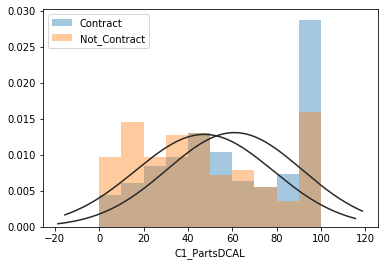

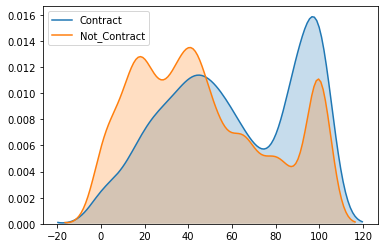

In [12]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for all equipment is 51%, mean for equipment on contract is 61%, mean for equipment not on contract is 47%.
Standard deviation are similiar across all 3 samples sizes.

Appears that customers have contract on average have 14% higher POPS than customers don't.
Customers have contract has high tendency to have very high POPS since they are completing all the services.

Customers who don't have contract but also have very high pops are potentially our target CVA customers.
Customers who don't have contract and also have very low pops are potentially our largestest opportunity pool.

C1_PartsDCAL should be kept as one of the lead points.

Weight: 10%

Element points: 60-100: 10/10; 50-60:5/10; 45-50: 2/10; 0-45: 0/10

Qualification: CustomerDivision PartsDCAL IS NOT NULL

Points ranking: 0/10

Constraint: Same TCDivisions for selected machines

Note: None

Message: 

This customer's POPS is %__. Customer is above %threshold 

threshold:('above average contract customer POPS'; 'above average customer POPS'; 'above average non-contract customer POPS'; 'below average customer POPS')

## C2_ServiceDCAL

In [13]:
#predefine variables so i only need to edit this box
X = 'C2_ServiceDCAL'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

(10974, 2)


C2_ServiceDCAL         124
M17_Contract_Active      0
dtype: int64
---------------------------------------
C2_ServiceDCAL         0
M17_Contract_Active    0
dtype: int64
---------------------------------------
C2_ServiceDCAL         float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
C2_ServiceDCAL         float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       C2_ServiceDCAL  On_Contract  Not_On_Contract   Difference
count    10850.000000  2892.000000      7958.000000 -5066.000000
mean        44.220857    65.990688        36.309529    29.681159
std         36.155689    35.330427        33.075454     2.254973
min          0.000000     0.000000         0.000000     0.000000
25%         13.207500    33.870000         9.270000    24.600000
50%         32.120000    75.685000        26.300000    49.385000
75%         80.830000   100.000000        58.510000    41.490000
max        100.000000   100.000000    

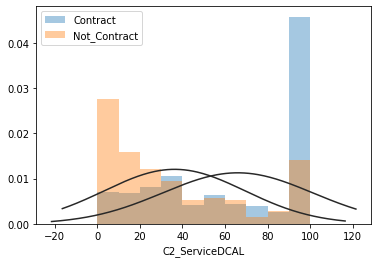

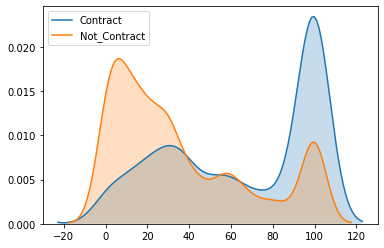

In [14]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for all equipment is 44%, mean for equipment on contract is 66%, mean for equipment not on contract is 36%.
Standard deviation are similiar across all 3 samples sizes.

Appears that customers have contract on average have 30% higher POLS than customers don't.
Customers have contract has high tendency to have very high POLS since they are completing the services using toromont labour.

Customers who don't have contract but also have very high POLS are potentially our target CVA customers.
Customers who don't have contract and also have very low POLS are potentially our largestest opportunity pool.
Customers who has contract but also have very low POLS are 1. DIM 2. Missed opportunity.

C2_ServiceDCAL should be kept as one of the lead points.

Weight: 10%

Element points: 65-100: 10/10; 45-65:5/10; 35-45: 2/10; 0-35: 0/10

Qualification: CustomerDivision ServiceDCAL IS NOT NULL

Points ranking: 0/10

Constraint: Same TCDivisions for selected machines

Note: None

Message: 

This customer's POLS is %__. Customer is above %threshold 

threshold:('above average contract customer POLS'; 'above average customer POLS'; 'above average non-contract customer POLS'; 'below average customer POLS')

## C3_PSPotential123

(10974, 2)
C3_PSPotential123      60
M17_Contract_Active     0
dtype: int64
---------------------------------------
C3_PSPotential123      0
M17_Contract_Active    0
dtype: int64
---------------------------------------


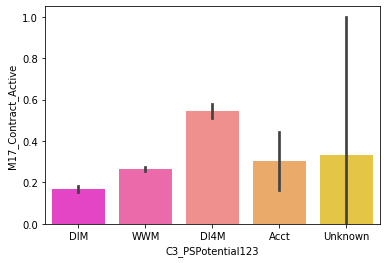

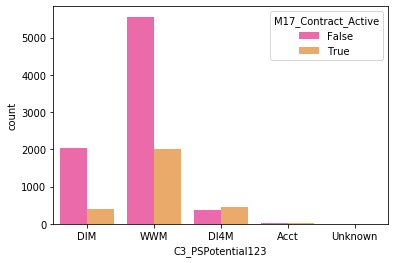

In [15]:
#predefine variables so i only need to edit this box
X = 'C3_PSPotential123'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

Plot shows that C3_DIM customers have only 17~18% time have M17_Contract_Active, while C4_DI4M customers have around 55% time have contract active.

For the contract active machines, 15% comes from DIM customers, 15% comes from DI4M customers and the rest come from others(WWM) customers.

Recommend assign element points to DI4M/WWM/DIM elements.

Weight: 5%

Element points: 'DI4M': 5/5; 'WWM':3/5; 'DIM': 1/5; 'Account','Unknown': 0/5

Qualification: CustomerDivision PSPotential123 IS NOT NULL

Points ranking: 0/5

Constraint: Same TCDivisions for selected machines

Note: None

Message: This customer's C3_PSPotential123 is %_.

## C4_PSPotentialABC

(10974, 2)
C4_PSPotentialABC      206
M17_Contract_Active      0
dtype: int64
---------------------------------------
C4_PSPotentialABC      0
M17_Contract_Active    0
dtype: int64
---------------------------------------


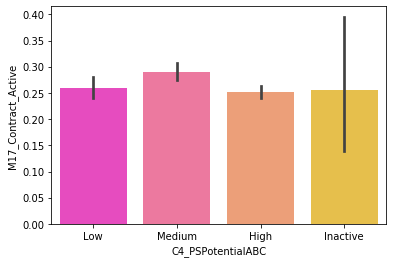

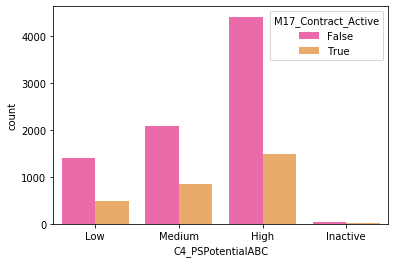

In [16]:
#predefine variables so i only need to edit this box
X = 'C4_PSPotentialABC'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

Cummulative percentage plot shows that C4_PSPotentialABC does not affect the probability of them signing a contract, but higher count does come from the HIGH group. Possibly because i filtered out a lot of "medium/low" customers that never signed contracts and affected bottomline of the first chart. Recommend 5% points.

Weight: 5%

Element points: 'High': 5/5; 'Medium':3/5; 'Low': 1/5; 'Inactive': 0/5

Qualification: 

Points ranking: 0/5

Constraint: 

Note: None

Message: This customer's PSPotentialABC is %__. 

## C8_Percentage_Parts_Purchased_Direct

In [17]:
#predefine variables so i only need to edit this box
X = 'C8_Percentage_Parts_Purchased_Direct'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.C8_Percentage_Parts_Purchased_Direct < 0])
testset = testset.drop(testset.index[testset.C8_Percentage_Parts_Purchased_Direct > 100])

(10974, 2)


C8_Percentage_Parts_Purchased_Direct    0
M17_Contract_Active                     0
dtype: int64
---------------------------------------
C8_Percentage_Parts_Purchased_Direct    0
M17_Contract_Active                     0
dtype: int64
---------------------------------------
C8_Percentage_Parts_Purchased_Direct    float64
M17_Contract_Active                       int64
dtype: object
---------------------------------------
C8_Percentage_Parts_Purchased_Direct    float64
M17_Contract_Active                        bool
dtype: object
---------------------------------------
       C8_Percentage_Parts_Purchased_Direct  On_Contract  Not_On_Contract  \
count                          10921.000000  2954.000000      7967.000000   
mean                              60.824248    50.303424        64.725154   
std                               31.538131    31.017571        30.831561   
min                                0.000000     0.000000         0.000000   
25%                               38.0868

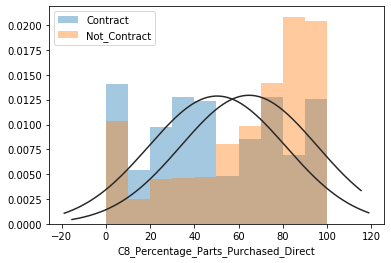

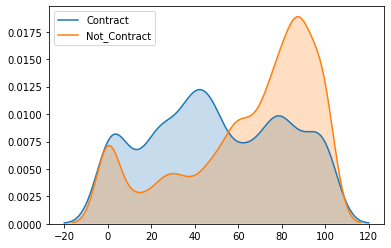

In [18]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean of % parts purchased direct for all machines is 60%. Mean of % direct for Contract machines are 50%, mean for equipment not on contract is 64%. The higher percentage customer buys from parts department and install themselves, the less likely customer is going to buy contract.

Customers who have PM contract and also have very low % direct are potentially MARC target customers.
Customers who have MARC contract and also have very high % direct possibly are large GET/hose consumers.

Customers who don't have contract and have very high % direct definitely has their own techs.
Customers who don't have contract have very low % direct are missed opportunity for CVA.

C8_Percentage_Parts_Purchased_Direct should be kept as one of the lead points

Weight: 5%

Element points: 0-50: 5/5; 50-60:3/5; 60-70: 1/5; 70-100: 0/5

Qualification

Points ranking: 0/5

Constraint: Same TCDivisions for selected machines

Note: None

Message: 

This customer's C8_Percentage_Parts_Purchased_Direct is %__. Customer is above %threshold 

threshold:('below average contract customer'; 'below average customer'; 'below average non-contract customer'; 'below average customer')

## C9_Percentage_Labour_Purchased_PSTotal

In [19]:
#predefine variables so i only need to edit this box
X = 'C9_Percentage_Labour_Purchased_PSTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

testset = testset.drop(testset.index[testset.C9_Percentage_Labour_Purchased_PSTotal < 0])
testset = testset.drop(testset.index[testset.C9_Percentage_Labour_Purchased_PSTotal > 100])

(10974, 2)


C9_Percentage_Labour_Purchased_PSTotal    0
M17_Contract_Active                       0
dtype: int64
---------------------------------------
C9_Percentage_Labour_Purchased_PSTotal    0
M17_Contract_Active                       0
dtype: int64
---------------------------------------
C9_Percentage_Labour_Purchased_PSTotal    float64
M17_Contract_Active                         int64
dtype: object
---------------------------------------
C9_Percentage_Labour_Purchased_PSTotal    float64
M17_Contract_Active                          bool
dtype: object
---------------------------------------
       C9_Percentage_Labour_Purchased_PSTotal  On_Contract  Not_On_Contract  \
count                            10933.000000  2951.000000      7982.000000   
mean                                22.680956    29.761363        20.063281   
std                                 17.988593    18.344099        17.130853   
min                                  0.000000     0.000000         0.000000   
25%            

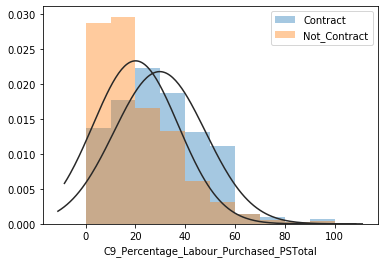

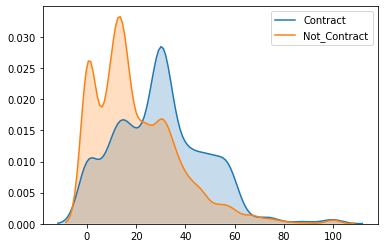

In [20]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean of % labour for Contract machines is 30%, mean for equipment not on contract is 20%. The higher percentage customer buys from labour service department, they more they rely on us maintaining the machine.

During tough times, small fleet owners may not be utilizing equipment as much and keeping a team of repair technicians may be financially infeasible. If this is the case for some of the customers, we should consider this percentage as an indicator to customer's reliance.

C9_Percentage_Labour_Purchased_PSTotal should be kept as one of the lead points

Weight: 5%

Element points: 30-100: 5/5; 25-30:3/5; 20-25: 1/5; 0-20: 0/5

Qualification

Points ranking: 0/5

Constraint:

Note: None

Message: 

This customer's C9_Percentage_Parts_Purchased_Direct is %__. Customer is above %threshold 

threshold:('below average contract customer'; 'below average customer'; 'below average non-contract customer'; 'below average customer')

## C10_Percentage_Parts_Purchased_ServiceTotal

In [21]:
#predefine variables so i only need to edit this box
X = 'C10_Percentage_Parts_Purchased_ServiceTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.C10_Percentage_Parts_Purchased_ServiceTotal < 0])
testset = testset.drop(testset.index[testset.C10_Percentage_Parts_Purchased_ServiceTotal > 100])

(10974, 2)


C10_Percentage_Parts_Purchased_ServiceTotal    0
M17_Contract_Active                            0
dtype: int64
---------------------------------------
C10_Percentage_Parts_Purchased_ServiceTotal    0
M17_Contract_Active                            0
dtype: int64
---------------------------------------
C10_Percentage_Parts_Purchased_ServiceTotal    float64
M17_Contract_Active                              int64
dtype: object
---------------------------------------
C10_Percentage_Parts_Purchased_ServiceTotal    float64
M17_Contract_Active                               bool
dtype: object
---------------------------------------
       C10_Percentage_Parts_Purchased_ServiceTotal  On_Contract  \
count                                 10953.000000   2961.00000   
mean                                     41.996890     43.20602   
std                                      23.831947     21.58732   
min                                       0.000000      0.00000   
25%                                

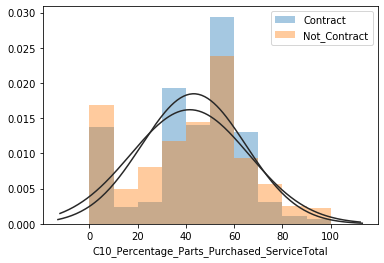

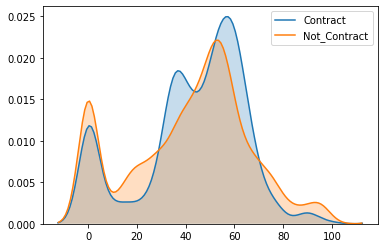

In [22]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

No significant differences. No points. Do not display

## C15_Percentage_Equipment_Currently_On_Contract

In [25]:
#predefine variables so i only need to edit this box
X = 'C15_Percentage_Equipment_Currently_On_Contract'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

testset = testset.drop(testset.index[testset.C15_Percentage_Equipment_Currently_On_Contract < 0])
testset = testset.drop(testset.index[testset.C15_Percentage_Equipment_Currently_On_Contract > 100])

(10974, 2)


C15_Percentage_Equipment_Currently_On_Contract    0
M17_Contract_Active                               0
dtype: int64
---------------------------------------
C15_Percentage_Equipment_Currently_On_Contract    0
M17_Contract_Active                               0
dtype: int64
---------------------------------------
C15_Percentage_Equipment_Currently_On_Contract    int64
M17_Contract_Active                               int64
dtype: object
---------------------------------------
C15_Percentage_Equipment_Currently_On_Contract    float64
M17_Contract_Active                                  bool
dtype: object
---------------------------------------
       C15_Percentage_Equipment_Currently_On_Contract  On_Contract  \
count                                    10845.000000  2856.000000   
mean                                        21.913140    55.819678   
std                                         28.929152    29.726742   
min                                          0.000000     0.000000   


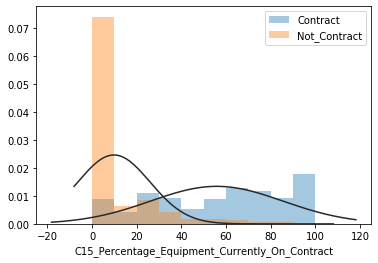

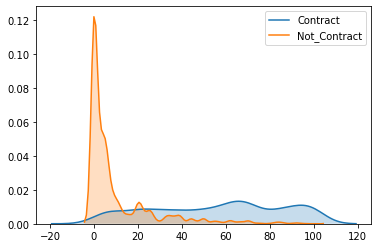

In [24]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

One of the determining factors: If customer believes in CVA value, he will buy CVA on all his suitable machines. Else, he might not buy any CVA.

Recommend high element points weight

Weight: 20%

Element points: 55-100: 20/10; 20-55:10/20; 0-20: 4/20; 0-0: 0/20

Qualification:

Points ranking: 0/20

Constraint:

Note: None

Message: 

This customer's fleet percentage on contract  %__. Customer is above %threshold 

threshold:('above average contract customer'; 'above average customer'; 'above average non-contract customer'; 'non-contract customer')

## Is_Customers_?_Top_Model

             Is_Customers_Top_Model  M17_Contract_Active
EquipmentId                                             
168235                            1                    0
168253                            1                    0
168257                            1                    0
168427                            5                    0
168428                            3                    0
(10974, 2)
Is_Customers_Top_Model    0
M17_Contract_Active       0
dtype: int64
---------------------------------------
Is_Customers_Top_Model    0
M17_Contract_Active       0
dtype: int64
---------------------------------------


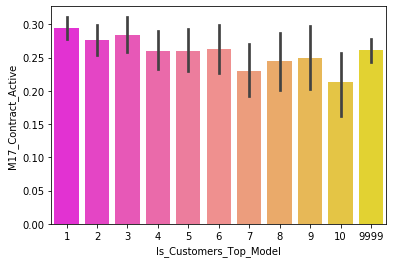

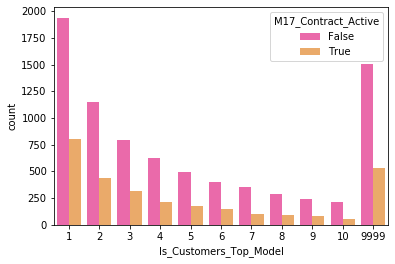

In [27]:
#predefine variables so i only need to edit this box
X = 'Is_Customers_Top_Model'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.head())
print(testset.shape)

#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

It is apparent the top 6 models across all customer fleets are over 25% on contract, while 7-10 are under 25% but still over 20%. No points for this category, information only.


Weight: 5

Element points: Top 6 models: 5/5 others: 0

Qualification:

Points ranking: 0/5

Constraint:

Note: None

Message: 

This machine is customer's top %_ model in quantity across his fleet.

## M18_Age_In_Years

In [28]:
#predefine variables so i only need to edit this box
X = 'M18_Age_In_Years'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M18_Age_In_Years > 30])
print(testset.shape)

(10406, 2)


M18_Age_In_Years       103
M17_Contract_Active      0
dtype: int64
---------------------------------------
M18_Age_In_Years       0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M18_Age_In_Years       float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
M18_Age_In_Years       float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       M18_Age_In_Years  On_Contract  Not_On_Contract   Difference
count      10303.000000  2943.000000      7360.000000 -4417.000000
mean           9.491993     6.609922        10.644429    -4.034507
std            6.701668     5.521609         6.784899    -1.263290
min            0.000000     0.000000         0.000000     0.000000
25%            4.000000     2.000000         5.000000    -3.000000
50%            8.000000     5.000000        10.000000    -5.000000
75%           14.000000    10.000000        15.000000    -5.000000
max           30.00000

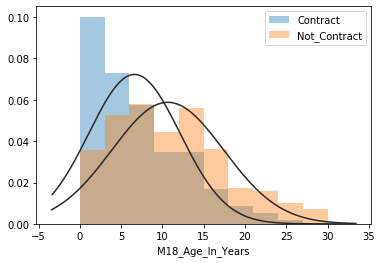

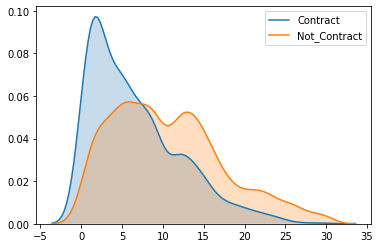

In [29]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Average age for all 10k machines is 9.48 (exlude machines over 30 years old from population), std 6.7

It is obvious customer much prefer to sign contracts in early ages. 1 standard deviation is cut of at 15 years

Weight: 10%

Element points: 0-6: 10/10; 6-10:5/10; >10: 0/10

Qualification: Age must be < 15 to be considered

Points ranking: 0/10

Constraint: 10 - 15 years will have no points but still be considered as CVA candidate machine.

Note: None

Message: 

This machine's age is %__. Machine is in %threshold 

threshold:('low age'; 'medium age'; 'high age')

## M19_LTDSMU

In [30]:
#predefine variables so i only need to edit this box
X = 'M19_LTDSMU'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)
testset = testset.drop(testset.index[testset.M19_LTDSMU > 50000])

(10974, 2)


M19_LTDSMU             177
M17_Contract_Active      0
dtype: int64
---------------------------------------
M19_LTDSMU             0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M19_LTDSMU             float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
M19_LTDSMU             float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
         M19_LTDSMU   On_Contract  Not_On_Contract   Difference
count  10705.000000   2958.000000      7747.000000 -4789.000000
mean    8244.100047   7755.406018      8430.695753  -675.289736
std     7864.710837   7976.725431      7813.977398   162.748033
min        0.000000      0.000000         0.000000     0.000000
25%     2500.000000   1977.000000      2756.500000  -779.500000
50%     6098.000000   5389.000000      6386.000000  -997.000000
75%    11378.000000  10796.750000     11673.500000  -876.750000
max    49000.000000  46920.000000     49000.00

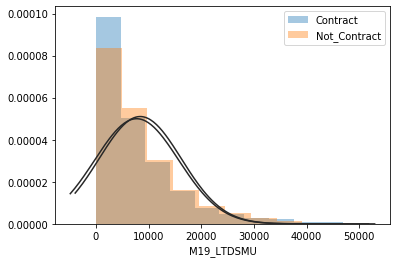

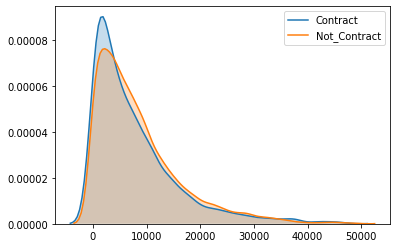

In [31]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Average and standard deviation does not seem to matter much in terms of if machine has a contract.

However worth to note if customer has already maintain his machine for a long term, unless business operation changes significantly, he would probably not sign new contract for a machine he knows very well.

No element points. Display message to accomodate M18_Age.

Weight: 0%

Element points: 0

Qualification: 

Points ranking: 0

Constraint:

Note: None

Message: 

This machine's LTDSMU is %__.

## M20_AnnualUsage

In [32]:
#predefine variables so i only need to edit this box
X = 'M20_AnnualUsage'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M20_AnnualUsage > 7200])
print(testset.shape)

(10951, 2)


M20_AnnualUsage        3617
M17_Contract_Active       0
dtype: int64
---------------------------------------
M20_AnnualUsage        0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M20_AnnualUsage        float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
M20_AnnualUsage        float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       M20_AnnualUsage  On_Contract  Not_On_Contract   Difference
count      7334.000000  2932.000000      4402.000000 -1470.000000
mean       1063.282227  1106.279895      1034.643162    71.636732
std         855.791160   851.091627       857.808300    -6.716673
min           0.000000     0.000000         0.000000     0.000000
25%         470.850000   518.300000       438.000000    80.300000
50%         883.300000   917.975000       861.400000    56.575000
75%        1438.100000  1492.850000      1397.950000    94.900000
max        7059.100000  7008

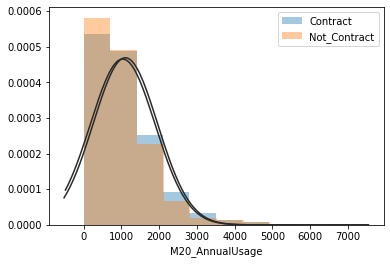

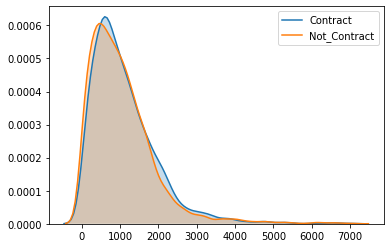

In [33]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Overall they do not vary very much. Mean for contract machines is about 77 hours higher than non-contract machines.

I hope it is result from combination of smart planning, afterhour services and failure prevention. 

If desired maybe compare the equipment fleet by fleet.

No element points. Information only

Weight: 0%

Element points: 0

Qualification: 

Points ranking: 0

Constraint:

Note: None

Message: 

This machine's annual usage is %__.

## M21_Potentially_Disposed

In [35]:
#predefine variables so i only need to edit this box
X = 'M21_Potentially_Disposed'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.head())
print(testset.shape)

             M21_Potentially_Disposed  M17_Contract_Active
EquipmentId                                               
168235                              1                    0
168253                              1                    0
168257                              0                    0
168427                              0                    0
168428                              0                    0
(10974, 2)


M21_Potentially_Disposed    0
M17_Contract_Active         0
dtype: int64
---------------------------------------
M21_Potentially_Disposed    0
M17_Contract_Active         0
dtype: int64
---------------------------------------


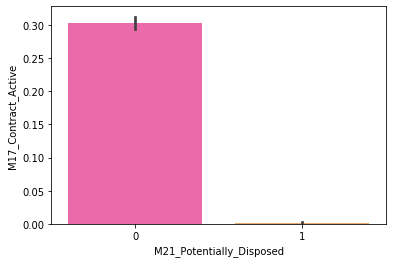

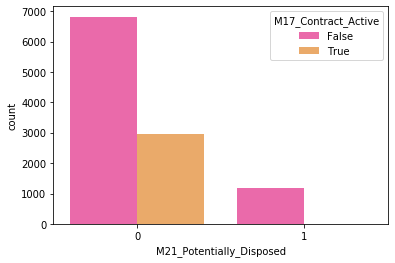

In [37]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

Appears my "potentiall_disposed" label is fairly accurate.

No element points but use as qualification

Weight: 0%

Element points: 0

Qualification: Potentially_Disposed = 0

Points ranking: 0/0

Constraint: 

Note: None

Message: None


## M22_PLActive

In [39]:
#predefine variables so i only need to edit this box
X = 'M22_PLActive'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]

M22_PLActive           0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M22_PLActive           0
M17_Contract_Active    0
dtype: int64
---------------------------------------


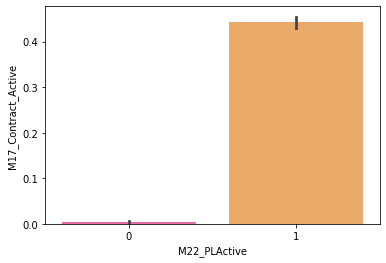

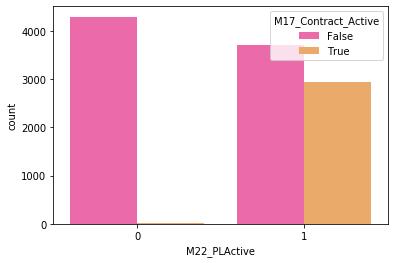

In [40]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
testset[Y] = testset[Y].astype('bool')
print('---------------------------------------')

sns.barplot(x=X, y=Y, data=testset, palette='spring')
plt.show()
sns.countplot(x=X, hue=Y, data=testset, palette = 'spring')
plt.show()

In order for contract to be active, PL needs to be active. 100% contract active has PL active; over 40% PL active has contract active.

There are 3500+ machines have PLActive, but no contract. We can create condition monitoring lite for them.

Weight: 5%

Element points: 1: 5/5 0: 0/5

Qualification: 

Points ranking: 0/5

Constraint:

Note: None

Message: 

This machine's Product link is %__.

threshold:('active'; 'not active';)


## M23_OLGAAmount

In [41]:
#predefine variables so i only need to edit this box
X = 'M23_OLGAAmount'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M23_OLGAAmount > 500000])
print(testset.shape)

(10931, 2)


M23_OLGAAmount         0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M23_OLGAAmount         0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M23_OLGAAmount         float64
M17_Contract_Active      int64
dtype: object
---------------------------------------
M23_OLGAAmount         float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       M23_OLGAAmount    On_Contract  Not_On_Contract   Difference
count    10931.000000    2953.000000      7978.000000 -5025.000000
mean     44336.504012   48844.576912     42667.872867  6176.704045
std      70873.768245   76806.756297     68477.497471  8329.258826
min          0.000000       0.000000         0.000000     0.000000
25%        365.000000       0.000000       633.265000  -633.265000
50%      11971.980000   13560.050000     11647.265000  1912.785000
75%      59330.715000   66330.540000     57459.432500  8871.107500
max     498849.580000  497

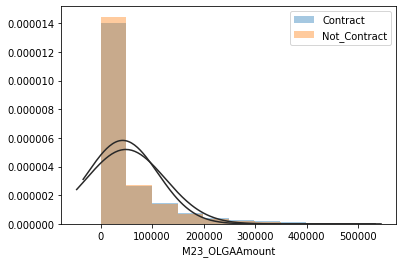

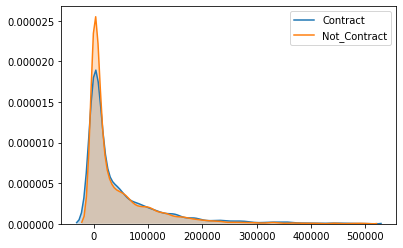

In [42]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


No significant difference. No element points.

## M25_Months_Until_Warranty_Ends

In [43]:
#predefine variables so i only need to edit this box
X = 'M25_Months_Until_Warranty_Ends'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

(10974, 2)


M25_Months_Until_Warranty_Ends    0
M17_Contract_Active               0
dtype: int64
---------------------------------------
M25_Months_Until_Warranty_Ends    0
M17_Contract_Active               0
dtype: int64
---------------------------------------
M25_Months_Until_Warranty_Ends    int64
M17_Contract_Active               int64
dtype: object
---------------------------------------
M25_Months_Until_Warranty_Ends    float64
M17_Contract_Active                  bool
dtype: object
---------------------------------------
       M25_Months_Until_Warranty_Ends  On_Contract  Not_On_Contract  \
count                    10974.000000  2967.000000      8007.000000   
mean                         5.245580     9.983822         3.489821   
std                         12.868723    16.887985        10.483937   
min                          0.000000     0.000000         0.000000   
25%                          0.000000     0.000000         0.000000   
50%                          0.000000     0.000000  

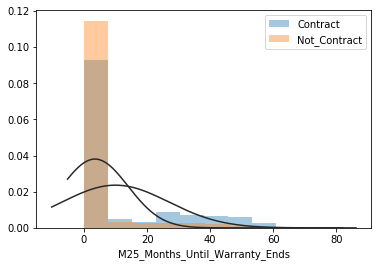

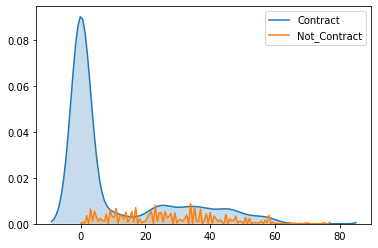

In [44]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


With contract machines generally being newer, the average warranty expire is 6 months higher than non-contract.

The longer the machine has warranty left, the easier it if for us to quote contract.


Weight: 5%

Element points: >6: 5/5 0-6: 3/5 0: 0/5

Qualification: 

Points ranking: 0/5

Constraint:

Note: None

Message: This machine has %__ months warranty left.

## M30_Number_Of_Contracts_Under_Base_Model

Information only. No element points.

Reps would generally feel more confident selling contract on machines we know very well.

## M32_Percentage_Parts_Purchased_Direct

In [45]:
#predefine variables so i only need to edit this box
X = 'M32_Percentage_Parts_Purchased_Direct'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M32_Percentage_Parts_Purchased_Direct > 100])
testset = testset.drop(testset.index[testset.M32_Percentage_Parts_Purchased_Direct < 0])
print(testset.shape)

(10939, 2)


M32_Percentage_Parts_Purchased_Direct    0
M17_Contract_Active                      0
dtype: int64
---------------------------------------
M32_Percentage_Parts_Purchased_Direct    0
M17_Contract_Active                      0
dtype: int64
---------------------------------------
M32_Percentage_Parts_Purchased_Direct    float64
M17_Contract_Active                        int64
dtype: object
---------------------------------------
M32_Percentage_Parts_Purchased_Direct    float64
M17_Contract_Active                         bool
dtype: object
---------------------------------------
       M32_Percentage_Parts_Purchased_Direct  On_Contract  Not_On_Contract  \
count                           10939.000000  2959.000000      7980.000000   
mean                               37.575037    23.601580        42.756423   
std                                43.041753    31.006411        45.650304   
min                                 0.000000     0.000000         0.000000   
25%                         

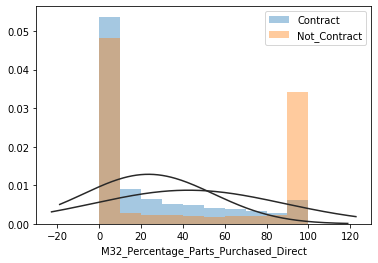

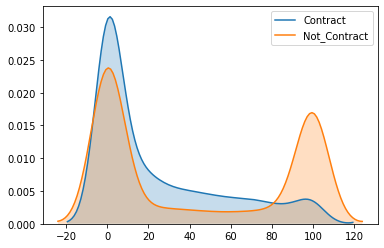

In [46]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()


Mean of % direct for Contract machines are 23.65%, mean for equipment not on contract is 42.75%. The higher percentage customer buys from parts department and install themselves, the less likely customer is going to buy contract.

Equipment currently has PM contract and also has very high % direct are potentially MARC target machine.
Equipment currently has MARC contract and also has very high % direct possibly are large GET/hose machine.

Equipment that doesn't have contract and have very high % direct definitely has their own techs.
Equipment that doesn't contract have very low % direct are missed opportunity for CVA.

M32_Percentage_Parts_Purchased_Direct should be kept as one of the lead points.

Weight: 10%

Element points: 0-25: 10/10; 25-45:5/10; 45-80: 2/10 >80: 0/10

Qualification:

Points ranking: 0/10

Constraint:

Note: None

Message: Customer purchased %_ parts direct for this machine. Customer is above %threshold.

threshold:('above average contract customer'; 'above average customer'; 'above average non-contract customer'; 'non-contract customer')

## M33_Percentage_Labour_Purchased_PSTotal

In [47]:
#predefine variables so i only need to edit this box
X = 'M33_Percentage_Labour_Purchased_PSTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M33_Percentage_Labour_Purchased_PSTotal < 0])
testset = testset.drop(testset.index[testset.M33_Percentage_Labour_Purchased_PSTotal > 100])
print(testset.shape)

(10937, 2)


M33_Percentage_Labour_Purchased_PSTotal    0
M17_Contract_Active                        0
dtype: int64
---------------------------------------
M33_Percentage_Labour_Purchased_PSTotal    0
M17_Contract_Active                        0
dtype: int64
---------------------------------------
M33_Percentage_Labour_Purchased_PSTotal    float64
M17_Contract_Active                          int64
dtype: object
---------------------------------------
M33_Percentage_Labour_Purchased_PSTotal    float64
M17_Contract_Active                           bool
dtype: object
---------------------------------------
       M33_Percentage_Labour_Purchased_PSTotal  On_Contract  Not_On_Contract  \
count                             10937.000000  2961.000000      7976.000000   
mean                                 19.663984    29.319778        16.079379   
std                                  23.970115    20.004619        24.328879   
min                                   0.000000     0.000000         0.000000   
25

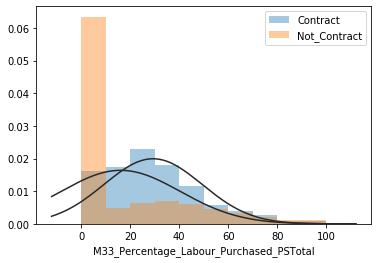

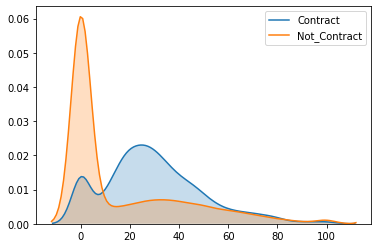

In [48]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Based on averages, we sell twice as much labour on contracts vs non-contracts. 

Customers who currently buys high percentage labour are candidates for contracts.

Weight: 10%

Element points: 30-100: 10/10; 20-30:5/10; 15-20: 2/10 0-15: 0/10

Qualification:

Points ranking: 0/10

Constraint:

Note: None

Message: Customer purchased %_ labour out of PS total. Customer is above %threshold.

threshold:('above average contract customer'; 'above average customer'; 'above average non-contract customer'; 'non-contract customer')

## M34_Percentage_Parts_Purchased_ServiceTotal

In [49]:
#predefine variables so i only need to edit this box
X = 'M34_Percentage_Parts_Purchased_ServiceTotal'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M34_Percentage_Parts_Purchased_ServiceTotal < 0])
testset = testset.drop(testset.index[testset.M34_Percentage_Parts_Purchased_ServiceTotal > 100])
print(testset.shape)

(10923, 2)


M34_Percentage_Parts_Purchased_ServiceTotal    0
M17_Contract_Active                            0
dtype: int64
---------------------------------------
M34_Percentage_Parts_Purchased_ServiceTotal    0
M17_Contract_Active                            0
dtype: int64
---------------------------------------
M34_Percentage_Parts_Purchased_ServiceTotal    float64
M17_Contract_Active                              int64
dtype: object
---------------------------------------
M34_Percentage_Parts_Purchased_ServiceTotal    float64
M17_Contract_Active                               bool
dtype: object
---------------------------------------
       M34_Percentage_Parts_Purchased_ServiceTotal  On_Contract  \
count                                 10923.000000  2952.000000   
mean                                     16.679091    26.564701   
std                                      22.432503    19.484603   
min                                       0.000000     0.000000   
25%                                

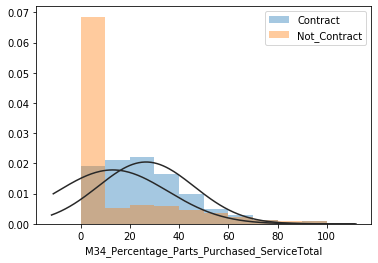

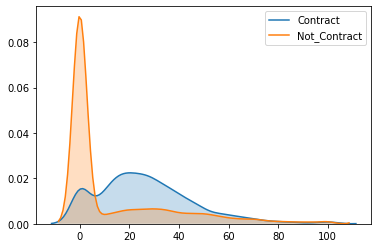

In [50]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Parts percentage from service is much higher on contract machines than non-contract machines.

It first surprised me but also makes sense. Customers who don't buy contracts may only use toromont for major or high technical repairs, VS 50%/50% split on lighter works(PM and preventative repairs).

No element points. I think this metric is confusing and should be taken out.

## M35_Percentage_Parts_Returned

In [51]:
#predefine variables so i only need to edit this box
X = 'M35_Percentage_Parts_Returned'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
testset = testset.drop(testset.index[testset.M35_Percentage_Parts_Returned > 100])

print(testset.shape)

(10968, 2)


M35_Percentage_Parts_Returned    0
M17_Contract_Active              0
dtype: int64
---------------------------------------
M35_Percentage_Parts_Returned    0
M17_Contract_Active              0
dtype: int64
---------------------------------------
M35_Percentage_Parts_Returned    int64
M17_Contract_Active              int64
dtype: object
---------------------------------------
M35_Percentage_Parts_Returned    float64
M17_Contract_Active                 bool
dtype: object
---------------------------------------
       M35_Percentage_Parts_Returned  On_Contract  Not_On_Contract  \
count                   10968.000000  2966.000000      8002.000000   
mean                        2.070751     1.751180         2.189203   
std                         9.380341     8.826764         9.575228   
min                         0.000000     0.000000         0.000000   
25%                         0.000000     0.000000         0.000000   
50%                         0.000000     0.000000         0.000000

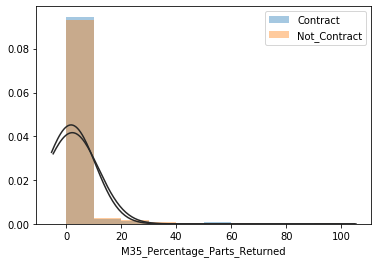

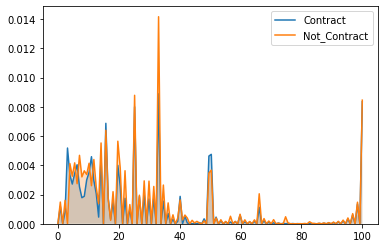

In [52]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Non contract machine normally has slightly higher return percentage than contract machines. (customer ordering wrong parts).

Information only

Weight: 0%

Element points: 0

Qualification:

Points ranking: 0

Constraint:

Note: None

Message: Customer's parts direct return percentage is %_.

## M36_Percentage_WO_Backed_Out

In [53]:
#predefine variables so i only need to edit this box
X = 'M36_Percentage_WO_Backed_Out'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

(10974, 2)


M36_Percentage_WO_Backed_Out    0
M17_Contract_Active             0
dtype: int64
---------------------------------------
M36_Percentage_WO_Backed_Out    0
M17_Contract_Active             0
dtype: int64
---------------------------------------
M36_Percentage_WO_Backed_Out    int64
M17_Contract_Active             int64
dtype: object
---------------------------------------
M36_Percentage_WO_Backed_Out    float64
M17_Contract_Active                bool
dtype: object
---------------------------------------
       M36_Percentage_WO_Backed_Out  On_Contract  Not_On_Contract   Difference
count                  10974.000000  2967.000000      8007.000000 -5040.000000
mean                       2.280755     3.313785         1.897964     1.415821
std                        8.435721     8.017825         8.554272    -0.536447
min                        0.000000     0.000000         0.000000     0.000000
25%                        0.000000     0.000000         0.000000     0.000000
50%                 

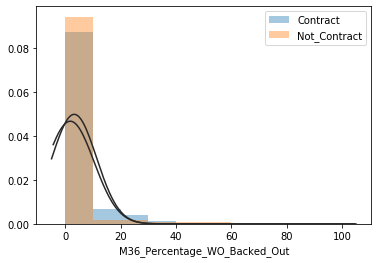

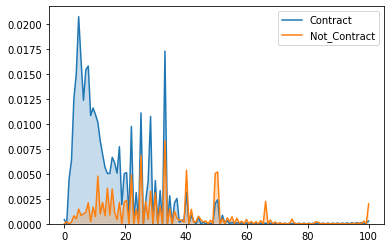

In [54]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Machines under contract has 70% more back outs than non contract machines.

This may be resultant of condition monitoring analyst / contract execution verifying billings.

Information only. No element points

Weight: 0%

Element points: 0

Qualification:

Points ranking: 0

Constraint:

Note: None

Message: Customer's service backout percentage is %_.

## M37_SOS_Count

In [55]:
#predefine variables so i only need to edit this box
X = 'M37_SOS_Count'
Y = 'M17_Contract_Active'
testset = data.loc[:,[X,Y]]
print(testset.shape)

(10974, 2)


M37_SOS_Count          0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M37_SOS_Count          0
M17_Contract_Active    0
dtype: int64
---------------------------------------
M37_SOS_Count          int64
M17_Contract_Active    int64
dtype: object
---------------------------------------
M37_SOS_Count          float64
M17_Contract_Active       bool
dtype: object
---------------------------------------
       M37_SOS_Count  On_Contract  Not_On_Contract   Difference
count   10974.000000  2967.000000      8007.000000 -5040.000000
mean       14.969929    32.760027         8.377794    24.382233
std        26.331406    34.840670        18.434666    16.406004
min         0.000000     0.000000         0.000000     0.000000
25%         0.000000     6.000000         0.000000     6.000000
50%         3.000000    23.000000         0.000000    23.000000
75%        20.000000    47.000000        10.000000    37.000000
max       342.000000   342.000000       322.000000    

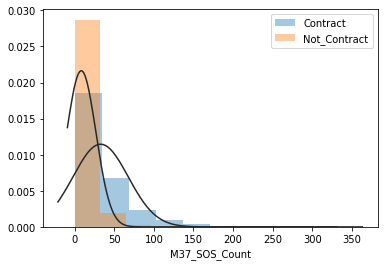

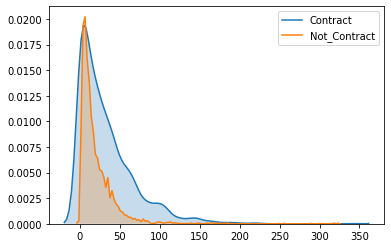

In [56]:
#Check for null value
print(testset.isnull().sum())
testset = testset.dropna()
print('---------------------------------------')
print(testset.isnull().sum())
print('---------------------------------------')
#Check data types
print(testset.dtypes)
testset[X] = testset[X].astype('float')
print('---------------------------------------')
testset[Y] = testset[Y].astype('bool')
print(testset.dtypes)
print('---------------------------------------')

#Seperate 2 dataframes
contract = testset.drop(testset.index[testset.M17_Contract_Active != 1])
notcontract = testset.drop(testset.index[testset.M17_Contract_Active == 1])

#Complete sample size after drop null
summary = testset.describe()
summary_contract = contract.describe()
summary_notcontract = notcontract.describe()
summary['On_Contract'] = summary_contract[X]
summary['Not_On_Contract'] = summary_notcontract[X]
summary['Difference'] = summary['On_Contract'] - summary['Not_On_Contract']

# add the standard deviation metric
# summary.loc['+1_std'] = summary.loc['mean'] + (summary.loc['std'] * 1)
# summary.loc['-1_std'] = summary.loc['mean'] - (summary.loc['std'] * 1)
# summary.loc['+2_std'] = summary.loc['mean'] + (summary.loc['std'] * 2)
# summary.loc['-2_std'] = summary.loc['mean'] - (summary.loc['std'] * 2)
# summary.loc['+3_std'] = summary.loc['mean'] + (summary.loc['std'] * 3)
# summary.loc['-3_std'] = summary.loc['mean'] - (summary.loc['std'] * 3)

print(summary)
print('---------------------------------------')
print(X,'top 10%: ',testset[X].quantile(.9))
print(X,'top 20%: ',testset[X].quantile(.8))
print(X,'top 25%: ',testset[X].quantile(.75))
print(X,'top 30%: ',testset[X].quantile(.7))
print(X,'top 50%: ',testset[X].quantile(.5))
print(X,'top 75%: ',testset[X].quantile(.25))
# print(data.quantile(.5))

x1 = contract[X]
x2 = notcontract[X]
ax1 = sns.distplot(x1,fit=norm,bins=10,kde=False,label="Contract")
ax2 = sns.distplot(x2,fit=norm,bins=10,kde=False,label="Not_Contract")
plt.legend()
plt.show()
ax1 = sns.kdeplot(x1, shade=True,label="Contract")
ax2 = sns.kdeplot(x2, shade=True,label="Not_Contract")
plt.legend()
plt.show()

Mean for equipment with contract is 33 SOS over 5 years, mean for equipment without SOS is 8 over 5 years.

SOS is a method of detecting issues and generate repairs. Higher SOS count increases likelihood generating parts and service sales.

No element points, information only.

Weight: 0%

Element points: 0

Qualification:

Points ranking: 0

Constraint:

Note: None

Message: Equipment's total SOS count is %_. The more samples we have the better we can detect early failure trends.

# regression

In [57]:
# Packages / libraries
# import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [59]:
#Data
df = pd.read_csv("C:/Work/Work/Data/CVA_explore.csv", index_col='EquipmentId')
print(df.shape)

(10974, 52)


In [60]:
#Drop most null columns or completely irrelevant or obviously multicolineary
data = df.drop(['C3_PSPotential123'
                ,'C4_PSPotentialABC'
                ,'C7_Average_Days_To_Pay'
                ,'C3_PSPotential123'
                ,'C4_PSPotentialABC'
               ,'C13_Cusomter_Preferred_Contract_Type'
               ,'C11_Customer_Prefered_Contract_Duration_Hours'
               ,'C12_Customer_Prefered_Contract_Duration_Months'
                ,'C14_Have_Signed_Contract_Before'
                ,'C16_Average_Contract_Value'
                ,'M20_AnnualUsage'
                ,'M24_Months_Until_Contract_Ends'
                ,'M26_Original_Contract_Length_In_Months'
                ,'M27_Original_Contract_Duration_In_Hours'
                ,'M28_Original_Contract_Type'
                ,'M29_Contract_Value'
                ,'M31_Average_Contract_Value_BaseModel_PM'
                ,'M32_Average_Contract_Value_BaseModel_MC'
                ,'M38_Average_Contract_Value_By_Months_PM'
                ,'M39_Average_Contract_Value_By_Months_MC'
                ,'M40_Average_Contract_Value_By_Hours_PM'
                ,'M41_Average_Contract_Value_By_Hours_MC'
                ,'M42_Estimated_Contract_Value_Customer_Preference'
               ,'New_CVA_Lead'
               ,'Renewal_CVA_Lead']
               ,axis=1)
null_columns = data.isnull().sum()
print(null_columns[null_columns>0])
data = data.dropna()
data.shape

C1_PartsDCAL                124
C2_ServiceDCAL              124
M18_Age_In_Years            103
M19_LTDSMU                  177
DI4M                          1
WWM                           1
DIM                           1
Account                       1
PS_PotentialABC_High          1
PS_PotentialABC_Medium        1
PS_PotentialABC_Low           1
PS_PotentialABC_Inactive      1
dtype: int64


(10593, 29)

In [61]:
# Split the data into X & y
X = data.drop('M17_Contract_Active', axis = 1).values
y = data['M17_Contract_Active']
y = y.astype(int)
print(X.shape)
print(y.shape)

(10593, 28)
(10593,)


In [62]:
# Run a Tree-based estimators (i.e. decision trees & random forests)
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

# Running Feature Importance
fi_col = []
fi = []

for i,column in enumerate(data.drop('M17_Contract_Active', axis = 1)):
#     print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

# Creating a Dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

print(fi_df)

    index                                         Feature  Feature Importance
0       5  C15_Percentage_Equipment_Currently_On_Contract            0.528852
1       9                                    M22_PLActive            0.199757
2      15     M34_Percentage_Parts_Purchased_ServiceTotal            0.044789
3       7                                      M19_LTDSMU            0.033367
4      18                                   M37_SOS_Count            0.022511
5      12        M30_Number_Of_Contracts_Under_Base_Model            0.020445
6       4     C10_Percentage_Parts_Purchased_ServiceTotal            0.019597
7       6                                M18_Age_In_Years            0.017598
8      10                                  M23_OLGAAmount            0.016481
9       2            C8_Percentage_Parts_Purchased_Direct            0.015816
10     14         M33_Percentage_Labour_Purchased_PSTotal            0.015443
11     13           M32_Percentage_Parts_Purchased_Direct       

In [ ]:
# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:40]

X = data[columns_to_keep].values

y = data['M17_Contract_Active']

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Training my model
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')

log_reg.fit(X_train, y_train)

In [ ]:
# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

In [ ]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Classification Report
print(classification_report(y_train, y_pred))

In [ ]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':15})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [ ]:
log_reg.classes_

In [ ]:
cm.sum(axis=1)
cm_norm

In [ ]:
cm.sum(axis=0)

In [ ]:
np.diag(cm)

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

In [ ]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))


In [ ]:
np.geomspace(1e-5, 1e5, num=20)

In [ ]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [ ]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

In [ ]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

In [ ]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)



# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

In [ ]:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
#     plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
#     plt.show()

In [ ]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)
# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [ ]:
# Final Model 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

